# **Assignment 18**

**Artificial Neural Networks**

 Data Exploration and Preprocessing

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
# Load the dataset
data = pd.read_csv("Alphabets_data.csv")

In [5]:
# Explore data
print(data.head())

  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


In [8]:
print(data.describe())

               xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.38082

In [9]:
# Check for missing values
print(data.isnull().sum())

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [27]:
numerical_features = data.select_dtypes(include=['number']).columns
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())

In [28]:
# Shuffle data
data = shuffle(data)

In [29]:
# Normalize features
features = data.iloc[:, :-1]
labels = data.iloc[:, -1]

In [39]:
categorical_features = features.select_dtypes(include=['object']).columns

In [40]:
# Encode labels
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with Keras
encoded_categorical = encoder.fit_transform(features[categorical_features])

In [41]:
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))


In [42]:
features = features.drop(columns=categorical_features)
features = pd.concat([features, encoded_categorical_df], axis=1)


In [43]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, one_hot_labels, test_size=0.2, random_state=42)

 Build and Train ANN Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [45]:
# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Number of classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3673 - loss: 1.9061 - val_accuracy: 0.4622 - val_loss: 1.3731
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4850 - loss: 1.3217 - val_accuracy: 0.5170 - val_loss: 1.2640
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5251 - loss: 1.2299 - val_accuracy: 0.5270 - val_loss: 1.2179
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5506 - loss: 1.1766 - val_accuracy: 0.5435 - val_loss: 1.1764
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5690 - loss: 1.1351 - val_accuracy: 0.5595 - val_loss: 1.1490
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5839 - loss: 1.0976 - val_accuracy: 0.5555 - val_loss: 1.1330
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5870 - loss: 1.0753 - val_accuracy: 0.5683 - val_loss: 1.1136
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6028 - loss: 1.0446 - val_accuracy: 0.

Hyperparameter Tuning

In [50]:
!pip install keras-tuner
from keras_tuner import RandomSearch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [51]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=128, step=16), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(hp.Int('units_2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [52]:
# Hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='alphabet_tuning'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 6 Complete [00h 00m 34s]
val_accuracy: 0.4482499957084656

Best val_accuracy So Far: 0.6023750007152557
Total elapsed time: 00h 08m 25s

Search: Running Trial #7

Value             |Best Value So Far |Hyperparameter
48                |80                |units_1
16                |64                |units_2
0.001             |0.001             |learning_rate

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3295 - loss: 2.0937 - val_accuracy: 0.4355 - val_loss: 1.4502
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4687 - loss: 1.3870 - val_accuracy: 0.4760 - val_loss: 1.3267
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5008 - loss: 1.2940 - val_accuracy: 0.4988 - val_loss: 1.2729
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5229 - loss: 1.2381 - val_accuracy: 0.5188 - val_loss: 1.2266
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5529 - loss: 1.1749 - val_accuracy: 0.5275 - val_loss: 1.1973
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5533 - loss: 1.1626 - val_accuracy: 0.5330 - val_loss: 1.1802
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5607 - loss: 1.1362 - val_accuracy: 0.5428 - val_loss: 1.1624
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5785 - loss: 1.1062 - val_accuracy: 0.5490 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3186 - loss: 2.1221 - val_accuracy: 0.4215 - val_loss: 1.5192
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4564 - loss: 1.4359 - val_accuracy: 0.4723 - val_loss: 1.3712
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4922 - loss: 1.3085 - val_accuracy: 0.4972 - val_loss: 1.2891
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5231 - loss: 1.2426 - val_accuracy: 0.5215 - val_loss: 1.2404
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5484 - loss: 1.1925 - val_accuracy: 0.5387 - val_loss: 1.2067
Epoch 6/10
165/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5517 - loss: 1.1507

KeyboardInterrupt: 

In [56]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [57]:
# Build the best model
best_model = tuner.hypermodel.build(best_hps)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
# Train the best model
best_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3734 - loss: 1.8463 - val_accuracy: 0.4753 - val_loss: 1.3501
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4964 - loss: 1.3020 - val_accuracy: 0.5105 - val_loss: 1.2500
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5427 - loss: 1.2017 - val_accuracy: 0.5260 - val_loss: 1.1961
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5640 - loss: 1.1492 - val_accuracy: 0.5452 - val_loss: 1.1528
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5881 - loss: 1.0865 - val_accuracy: 0.5685 - val_loss: 1.1209
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5991 - loss: 1.0497 - val_accuracy: 0.5732 - val_loss: 1.0952
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6038 - loss: 1.0382 - val_accuracy: 0.5782 - val_loss: 1.0850
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6121 - loss: 0.9996 - val_accuracy: 0.

Model Evaluation

In [65]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [66]:
# Evaluate the model
y_pred = np.argmax(best_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [72]:
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Classification Report:")
unique_labels = np.unique(np.concatenate((y_true, y_pred)))

# Convert target names to strings
filtered_target_names = [str(label_encoder.classes_[i]) for i in unique_labels]
# The original code was missing str() casting

print(classification_report(y_true, y_pred, target_names=filtered_target_names))

Accuracy: 0.605
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.61      0.39      0.48        28
           4       0.46      0.47      0.46       100
           5       0.48      0.48      0.48       190
           6       0.52      0.40      0.45       389
           7       0.51      0.59      0.55       711
           8       0.75      0.80      0.77      1571
           9       0.55      0.36      0.44       483
          10       0.42      0.59      0.49       307
          11       0.61      0.46      0.53       173
          12       0.21      0.10      0.14        29
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         2

    accuracy                           0.60      4000
   macro avg       0.34      0.31      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [73]:
# Confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

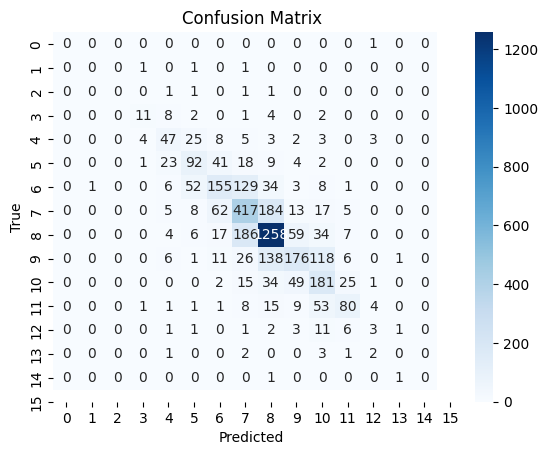

In [74]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()